# EXERCICE 3 : REGRESSION LINEAIRE MULTIPLE AVEC REGULARISATION + VALIDATION CROISEE


Inspire de http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html


In [1]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error


##### generation de donnee synthetiques...

In [2]:

np.random.seed(31)

#... definition de n et p
n = 75
p =  200   #remarque : n<200 => necessite de selectionner des variables

#... simulation de X
X = np.random.randn(n, p) #remarque : on ne tient pas en compte les $beta_0$

#... generation du vecteur beta dans lequel seules 10 valeurs sont non-nulles
beta = 3 * np.random.randn(p)
inds = np.arange(p)
np.random.shuffle(inds)
beta[inds[10:]] = 0 

#... simulation de y 
y = np.dot(X, beta) + (0.01 * np.random.normal(size=n))


# REMARQUE IMPORTANTE : y ne dépend que des variables i pour lesquelles beta[i] est non-nul


# ... coupe en deux les donnees en donnees d'apprentissage et donnes test
thresh=n // 2
X_train = X[thresh:]
y_train = y[thresh:]
X_test = X[:thresh]
y_test = y[:thresh]


##### regression lineaire avec regularisation Lasso ...


In [3]:
#... regression
from sklearn.linear_model import Lasso

alpha = 0.5
lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(X_train, y_train)

y_pred_lasso = lasso_regressor.predict(X_test)
mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)


#####  representation du resultat


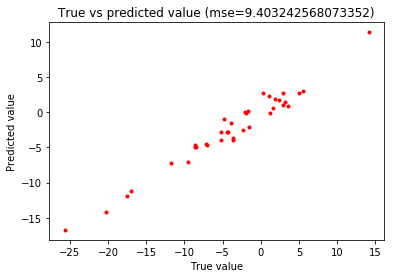

In [4]:
fig = plt.figure()
plt.plot(y_test, y_pred_lasso, 'r.')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title('True vs predicted value (mse='+str(mse_score_lasso)+')')
plt.show()



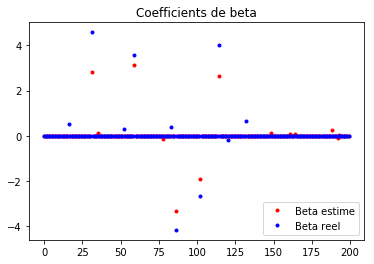

In [5]:

fig = plt.figure()
plt.plot(lasso_regressor.coef_, 'r.')
plt.plot(beta, 'b.')
plt.legend(('Beta estime', 'Beta reel'), loc='lower right')
plt.title('Coefficients de beta')
plt.show()


#### QUESTION 1 :

Jouez l'exemple avec n=100, n=75, n=50, n=25. Qu'en deduisez vous sur l'impact du nombre d'observations

#### Réponse :

En dessous de 75 observations, on a du mal a avoir de bonnes predictions et estimer les bon beta. 


#### QUESTION 2:
On garde n=75. Utiliser la validation croisee de type K-folds pour trouver le meilleur coefficient alpha au sens de la MSE.

AIDE : Pour comprendre l'utilisation de K-folds sous sklearn vous pouvez jouer l'exemple ci-dessous


In [6]:

from sklearn.model_selection import KFold

#data = np.random.randn(12,3)
#kf = KFold(n_splits=3)
#
#for train, test in kf.split(data):
#  print("+++++++++++++++++++++++++++++++++++++++")
#  print('train='+str(train)+':')
#  print(str(data[train,:]))
#  print('test='+str(test)+':')
#  print(str(data[test,:]))
#  print("+++++++++++++++++++++++++++++++++++++++")

#-> 1ere passe : estimtion de l'echelle du alpha optimal

kf = KFold(n_splits=8)
for alpha in [0.001,0.01,0.1,1.,10.]:
  sum_mse_scores=0.
  for train, test in kf.split(X):
    X_train=X[train]
    y_train=y[train]
    X_test=X[test]
    y_test=y[test]
  
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_train, y_train)
  
    y_pred_lasso = lasso_regressor.predict(X_test)
    mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)
    sum_mse_scores+=mse_score_lasso
  print(alpha," total: ",sum_mse_scores)




0.001  total:  44.5655134695861
0.01  total:  0.019252884706103788
0.1  total:  1.803834839203997
1.0  total:  83.9616679390914
10.0  total:  571.9274446602418


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

Meilleur score obtenu pour alpha=0.01


In [7]:

#-> 2eme passe : estimation plus fine du alpha optimal

kf = KFold(n_splits=8)
for alpha in [0.0025,0.005,0.01,0.02,0.04,0.08]:
  sum_mse_scores=0.
  for train, test in kf.split(X):
    X_train=X[train]
    y_train=y[train]
    X_test=X[test]
    y_test=y[test]
  
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_train, y_train)
  
    y_pred_lasso = lasso_regressor.predict(X_test)
    mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)
    sum_mse_scores+=mse_score_lasso
  print(alpha," total: ",sum_mse_scores)


0.0025  total:  0.0034820925584265394
0.005  total:  0.006159258108653941
0.01  total:  0.019252884706103788
0.02  total:  0.07323387003640719
0.04  total:  0.28905511863523137
0.08  total:  1.155084548900764



Meilleur score obtenu pour alpha=0.0025


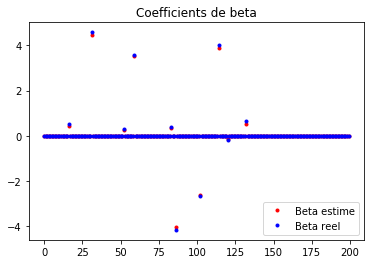

In [8]:
fig = plt.figure()
plt.plot(lasso_regressor.coef_, 'r.')
plt.plot(beta, 'b.')
plt.legend(('Beta estime', 'Beta reel'), loc='lower right')
plt.title('Coefficients de beta')
plt.show()

### Question 3

Utilisation d'une sélection de type *forward* avec un critère de sélection *BIC*


In [10]:

from sklearn.linear_model import LinearRegression


def bic_forward_step(selected_variables,X_train,y_train,X_test,y_test):
    bic_curr = np.inf
    best_variable = -1
    for i in range(p):
        if i not in selected_variables:
            select_var_temp = selected_variables.copy()
            select_var_temp.append(i)
            
            # LR avec cette observation en plus
            lr = LinearRegression()
            lr.fit(X_train[:, select_var_temp], y_train)
            
            # Critère de BIC
            y_p = lr.predict(X_test[:, select_var_temp])
            MSE_M = np.mean(np.power(y_p - y_test,2))
            bic_new = n * np.log(MSE_M) + np.log(n) * (len(select_var_temp) + 1)
            
            if bic_new < bic_curr:
                bic_curr = bic_new
                best_variable = i
    
    # On prend le i qui minimise BIC
    return bic_curr, best_variable


[59, 86, 31, 60, 26, 167, 187, 87, 11, 45, 94, 125, 180, 152, 66, 79, 136, 184]


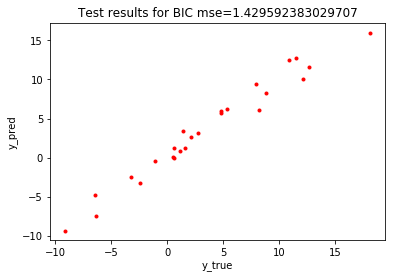

In [14]:

#split training and test data
X_train=X[:50,:]
y_train=y[:50]
X_test=X[50:,:]
y_test=y[50:]


#init
bic_best = np.inf
selected_variables = []
new_bic, new_ind = bic_forward_step(selected_variables,X_train,y_train,X_test,y_test)

#iterative forward selection
while new_bic < bic_best and len(selected_variables)<p:
    selected_variables.append(new_ind)
    bic_best = new_bic
    new_bic, new_ind = bic_forward_step(selected_variables,X_train,y_train,X_test,y_test)
print(selected_variables)



lr_bic = LinearRegression()
lr_bic.fit(X_train[:, selected_variables], y_train)
y_p_bic = lr_bic.predict(X_test[:, selected_variables])
mse_bic = np.mean(np.power(y_p_bic - y_test,2))
plt.figure()
plt.plot(y_test, y_p_bic, 'r.')
plt.xlabel("y_true")
plt.ylabel("y_pred")
plt.title(f"Test results for BIC mse={mse_bic}")
plt.show()


